# Machine Learning Assignment 2
Muhammad Ghulam Abbas (29417) and Muhammad Adnan Ali(29401)

This project analyze the effects of different techniques on the performance of machine learning models for regression and classification tasks using four datasets. The analysis focuses on evaluating the impact of cross-validation and feature selection methods, including filter, wrapper, and PCA.

# k Nearest Neighbours
In this project, I build a k Nearest Neighbours regressor to classify the predict life expectency  from Breast Cancer. I have used the life expentancy  Data Set.

# Dataset Description


The dataset consists of 22 columns of which 20 are predictor variables and 2938 rows.

<h3>Columns</h3>
   1. <b>Country</b>: Country
   <br>2. <b>Year</b>: Year
   <br>3. <b>Status</b>: Developed or Developing status
   <br>4. <b>Life expectancy</b>: Life Expectancy in age
   <br>5. <b>Adult Mortality</b>: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
   <br>6. <b>infant deaths</b>: Number of Infant Deaths per 1000 population
   <br>7. <b>Alcohol</b>: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
   <br>8. <b>percentage expenditure</b>: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
   <br>9. <b>Hepatitis B</b>: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
   <br>10. <b>Measles</b>: Measles - number of reported cases per 1000 population
   <br>11. <b>BMI</b>: Average Body Mass Index of entire population
   <br>12. <b>under-five deaths</b>: Number of under-five deaths per 1000 population
   <br>13. <b>Polio</b>: Polio (Pol3) immunization coverage among 1-year-olds (%)
   <br>14. <b>Total expenditure</b>: General government expenditure on health as a percentage of total government expenditure (%)
   <br>15. <b>Diphtheria</b>: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
   <br>16. <b>HIV/AIDS</b>: Deaths per 1 000 live births HIV/AIDS (0-4 years)
   <br>17. <b>GDP</b>: Gross Domestic Product per capita (in USD)
   <br>18. <b>Population</b>: Population of the country
   <br>19. <b>thinness 1-19 years</b>: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
   <br>20. <b>thinness 5-9 years</b>: Prevalence of thinness among children for Age 5 to 9(%)
   <br>21. <b>Income composition of resources</b>: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
   <br>22. <b>Schooling</b>: Number of years of Schooling(years)
   

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "C:/Users/lenovo1/Downloads/Regression.Life.Expectancy.csv"
df= pd.read_csv(file_path)

In [3]:
df.rename(columns={'Life expectancy ':'Life_Expectancy', 'Adult Mortality':'Adult_Mortality','infant deaths':'Infant_Deaths','percentage expenditure':'Percentage_Exp', 'Hepatitis B':'Hepatitis_B', 'Measles ':'Measles', ' BMI ':'BMI',
                          'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_Exp','Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
                          ' thinness  1-19 years':'thinness_1_to_19', ' thinness 5-9 years':'thinness_5_to_9', 'Income composition of resources':'Income_Composition'}, inplace=True)

In [4]:
df.dtypes

Country                object
Year                    int64
Status                 object
Life_Expectancy       float64
Adult_Mortality       float64
Infant_Deaths           int64
Alcohol               float64
Percentage_Exp        float64
Hepatitis_B           float64
Measles                 int64
BMI                   float64
under_five_deaths       int64
Polio                 float64
Total_Exp             float64
Diphtheria            float64
HIV/AIDS              float64
GDP                   float64
Population            float64
thinness_1_to_19      float64
thinness_5_to_9       float64
Income_Composition    float64
Schooling             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2938 non-null   object 
 1   Year                2938 non-null   int64  
 2   Status              2938 non-null   object 
 3   Life_Expectancy     2928 non-null   float64
 4   Adult_Mortality     2928 non-null   float64
 5   Infant_Deaths       2938 non-null   int64  
 6   Alcohol             2744 non-null   float64
 7   Percentage_Exp      2938 non-null   float64
 8   Hepatitis_B         2385 non-null   float64
 9   Measles             2938 non-null   int64  
 10  BMI                 2904 non-null   float64
 11  under_five_deaths   2938 non-null   int64  
 12  Polio               2919 non-null   float64
 13  Total_Exp           2712 non-null   float64
 14  Diphtheria          2919 non-null   float64
 15  HIV/AIDS            2938 non-null   float64
 16  GDP   

In [6]:
df.isna().sum()

Country                 0
Year                    0
Status                  0
Life_Expectancy        10
Adult_Mortality        10
Infant_Deaths           0
Alcohol               194
Percentage_Exp          0
Hepatitis_B           553
Measles                 0
BMI                    34
under_five_deaths       0
Polio                  19
Total_Exp             226
Diphtheria             19
HIV/AIDS                0
GDP                   448
Population            652
thinness_1_to_19       34
thinness_5_to_9        34
Income_Composition    167
Schooling             163
dtype: int64

In [7]:
df.replace(" ", np.NaN, inplace = True)

# Handling missing value by Chain Imputation Method

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Identify variables with missing values
variables_with_missing = df.columns[df.isnull().any()].tolist()

# Determine the order of imputation based on dependencies (you can customize this)
imputation_order = [
    'Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B',
    'BMI', 'Polio', 'Total_Exp', 'Diphtheria', 'GDP',
    'Population', 'thinness_1_to_19', 'thinness_5_to_9',
    'Income_Composition', 'Schooling'
]


# Split dataset into two parts
df_complete = df.drop(columns=variables_with_missing)
df_incomplete = df[variables_with_missing]

# Apply iterative imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_incomplete), columns=variables_with_missing)

# Combine imputed data with complete data
df_complete[variables_with_missing] = df_imputed

# Now df_complete contains your dataset with missing values imputed


In [9]:
df = df_complete

In [10]:
df.isna().sum()

Country               0
Year                  0
Status                0
Infant_Deaths         0
Percentage_Exp        0
Measles               0
under_five_deaths     0
HIV/AIDS              0
Life_Expectancy       0
Adult_Mortality       0
Alcohol               0
Hepatitis_B           0
BMI                   0
Polio                 0
Total_Exp             0
Diphtheria            0
GDP                   0
Population            0
thinness_1_to_19      0
thinness_5_to_9       0
Income_Composition    0
Schooling             0
dtype: int64

In [11]:
df.describe()

,Year,Infant_Deaths,Percentage_Exp,Measles,under_five_deaths,HIV/AIDS,Life_Expectancy,Adult_Mortality,Alcohol,Hepatitis_B,BMI,Polio,Total_Exp,Diphtheria,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,30.303948,738.251295,2419.592240,42.035739,1.742103,69.225797,164.733468,4.595414,78.739456,38.135553,82.469387,5.931846,82.240299,7375.329834,1.271033e+07,4.851105,4.883457,0.625980,11.985851
std,4.613841,117.926501,1987.914858,11467.272489,160.445548,5.077785,9.518254,124.130169,3.978907,24.971051,20.020135,23.383822,2.411463,23.674710,13410.275393,5.381643e+07,4.395969,4.484586,0.210363,3.354137
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.100000,36.300000,1.000000,-3.488974,1.000000,1.000000,3.000000,0.370000,2.000000,-12297.779682,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,4.685343,0.000000,0.000000,0.100000,63.100000,74.000000,1.000000,72.315115,19.300000,78.000000,4.360000,78.000000,475.629101,4.189172e+05,1.600000,1.600000,0.488000,10.000000
50%,2008.000000,3.000000,64.912906,17.000000,4.000000,0.100000,72.100000,144.000000,3.880000,89.000000,43.000000,93.000000,5.780000,93.000000,2336.273501,3.675929e+06,3.400000,3.400000,0.677000,12.300000
75%,2012.000000,22.000000,441.534144,360.250000,28.000000,0.800000,75.600000,227.750000,7.530000,96.000000,56.100000,97.000000,7.338490,97.000000,7665.827621,1.269887e+07,7.100000,7.200000,0.779000,14.300000
max,2015.000000,1800.000000,19479.911610,212183.000000,2500.000000,50.600000,89.000000,723.000000,17.870000,99.000000,87.300000,99.000000,17.600000,99.000000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [12]:
#Categorical attribute of dataset
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

<Axes: xlabel='Status'>

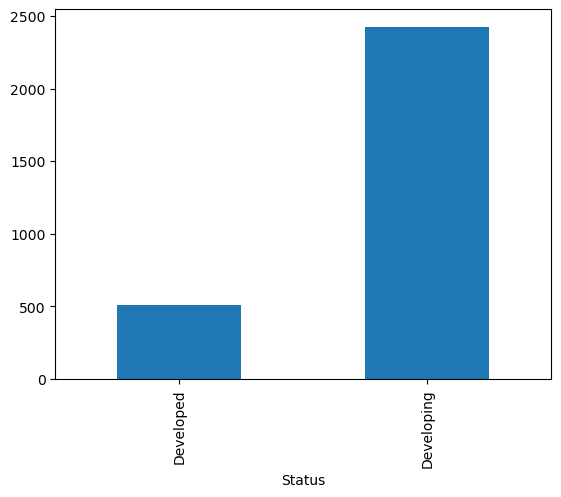

In [13]:
df.groupby('Status').count()['Life_Expectancy'].plot(kind = 'bar')

In [14]:
df['Status']=df['Status'].map({'Developing':1,'Developed':0}).astype(int)

In [15]:
df.drop('Country', axis = 1, inplace = True)


# Exploratory Data Analysis

Skewness for column 'Year': -0.0064090273593942005 (left-skewed)
Skewness for column 'Infant_Deaths': 9.786962950426057 (right-skewed)
Skewness for column 'Percentage_Exp': 4.6520513478350605 (right-skewed)
Skewness for column 'Measles': 9.441331947061583 (right-skewed)
Skewness for column 'under_five_deaths': 9.495064656961773 (right-skewed)
Skewness for column 'HIV/AIDS': 5.396112042126371 (right-skewed)
Skewness for column 'Life_Expectancy': -0.6400636915631149 (left-skewed)
Skewness for column 'Adult_Mortality': 1.1764915657170099 (right-skewed)
Skewness for column 'Alcohol': 0.5678246737796349 (right-skewed)
Skewness for column 'Hepatitis_B': -1.6603182718980545 (left-skewed)
Skewness for column 'BMI': -0.1997009024433652 (left-skewed)
Skewness for column 'Polio': -2.0881453543746225 (left-skewed)
Skewness for column 'Total_Exp': 0.6410782855300701 (right-skewed)
Skewness for column 'Diphtheria': -2.06222167021491 (left-skewed)
Skewness for column 'GDP': 3.287436522423136 (right-s

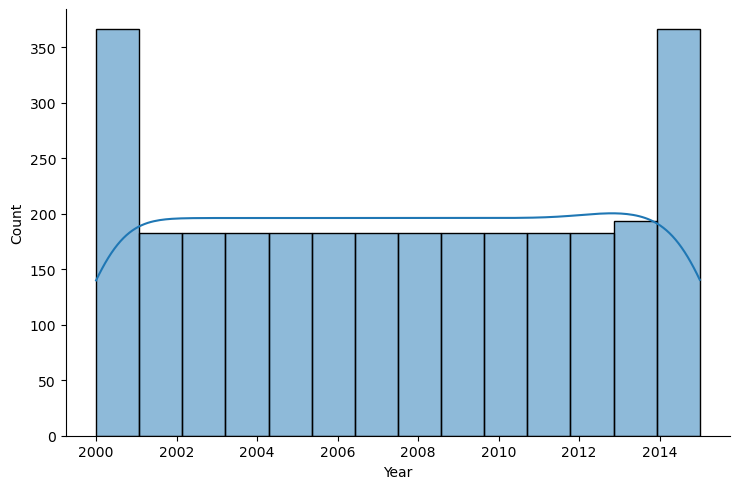

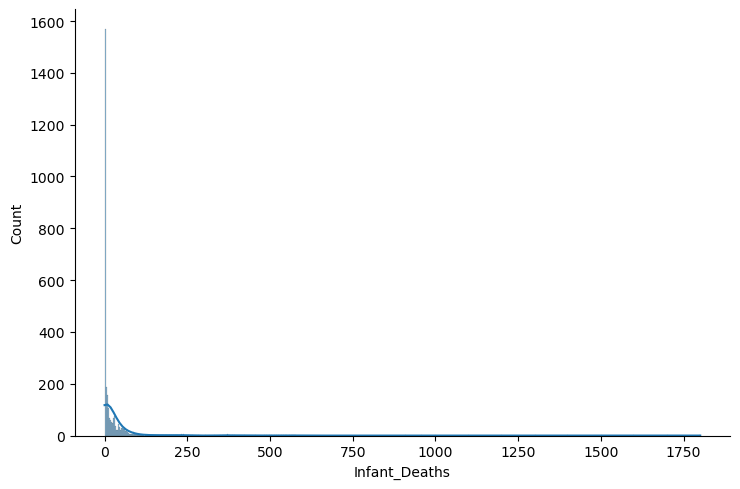

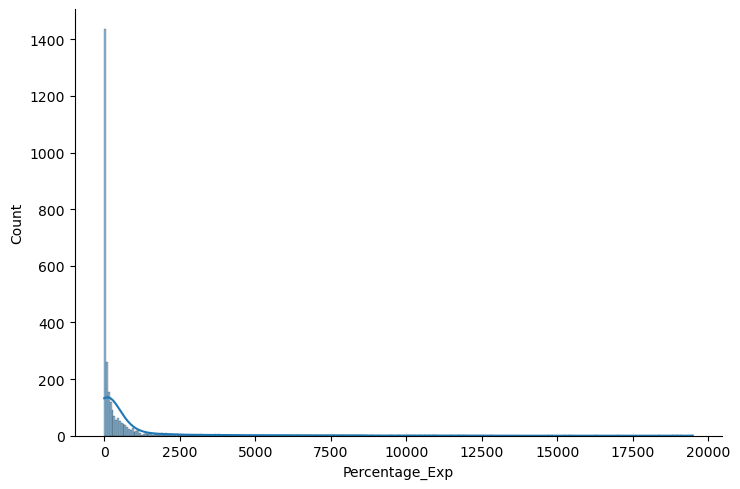

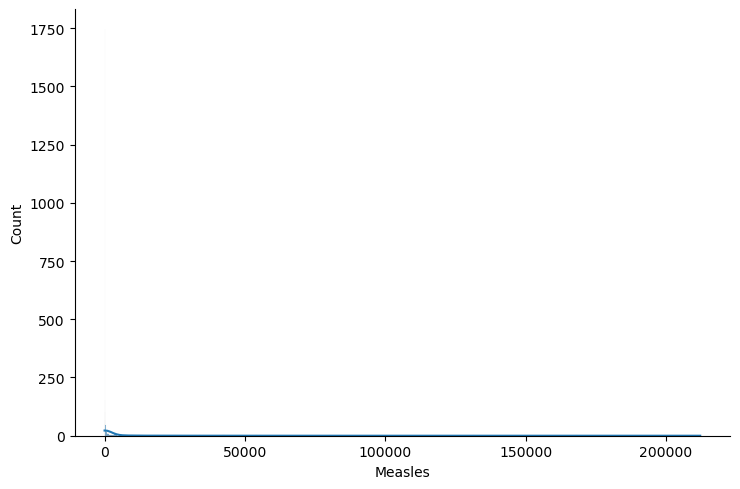

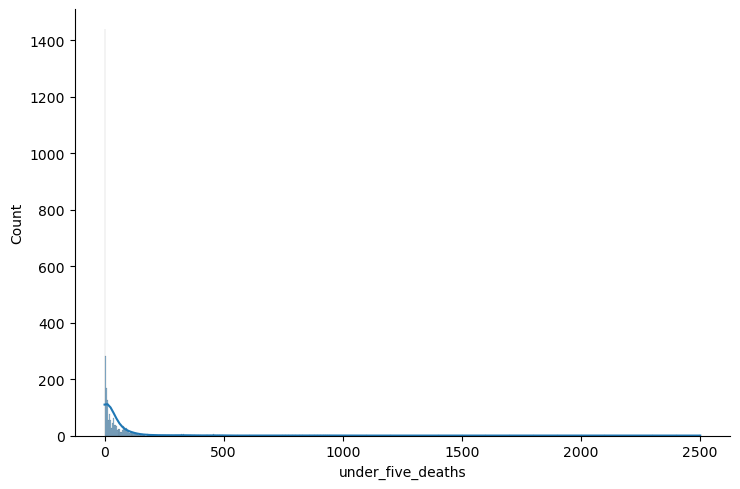

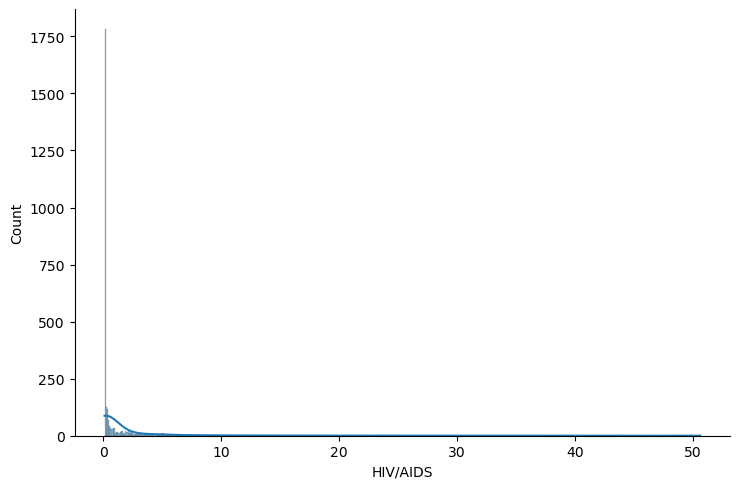

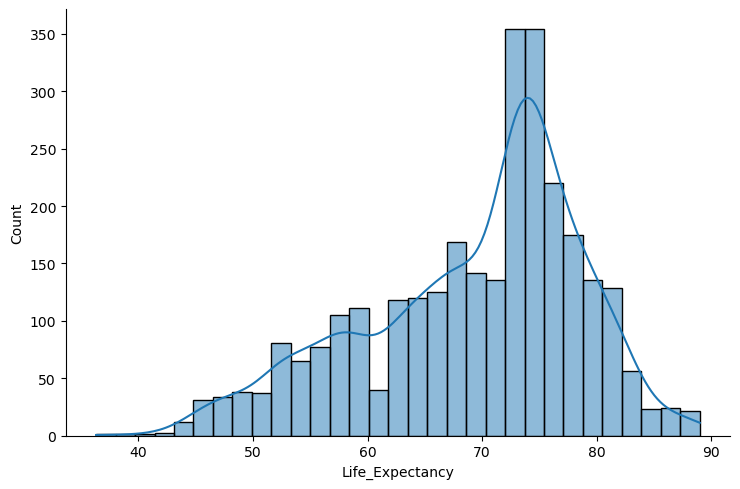

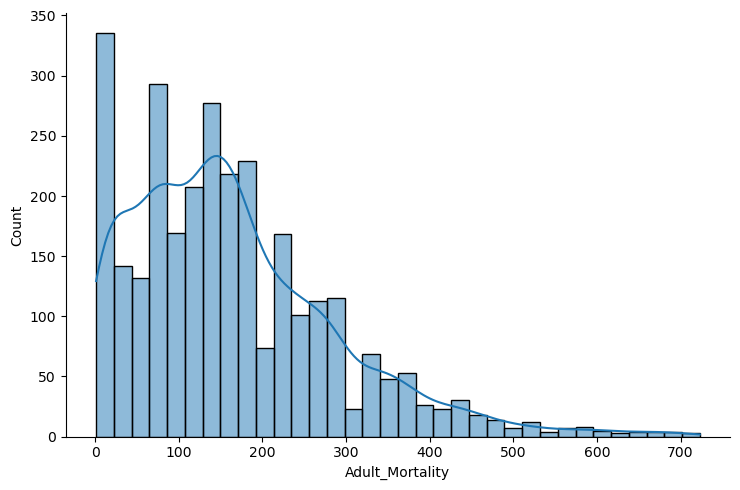

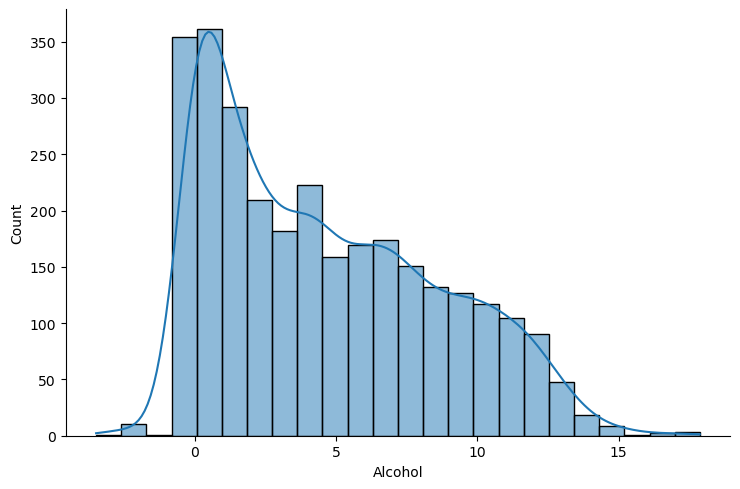

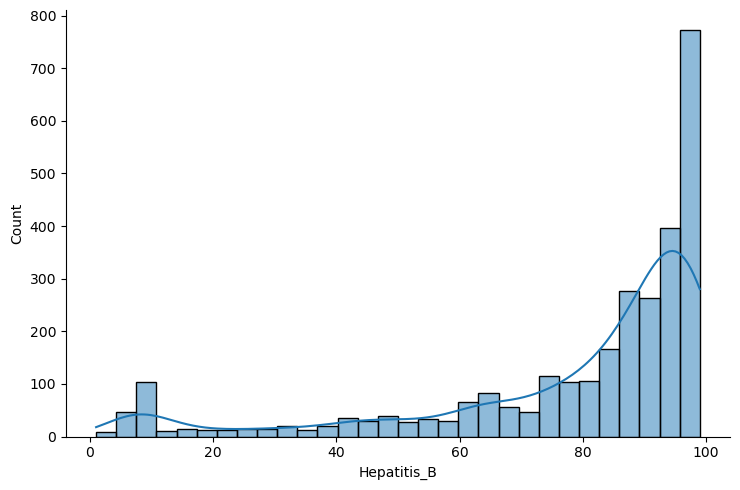

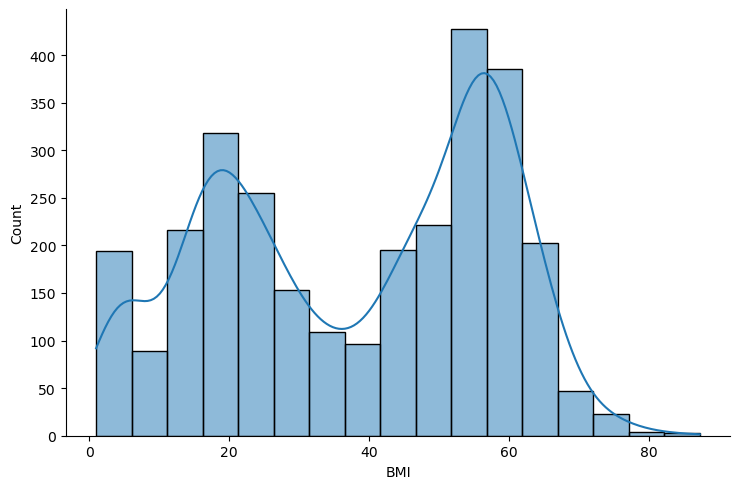

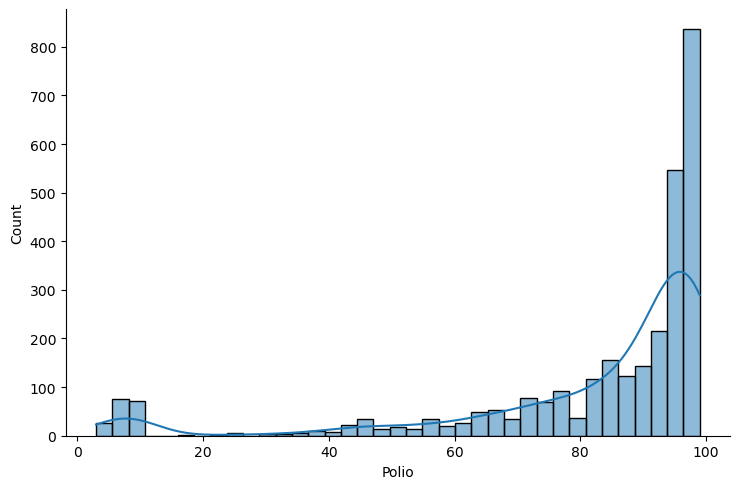

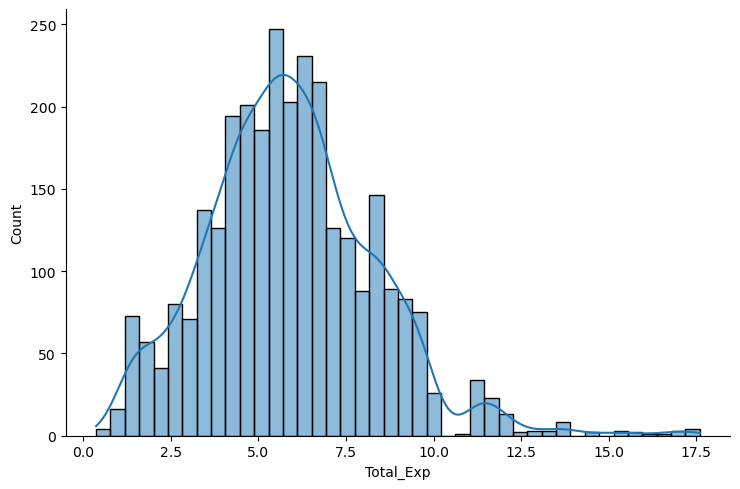

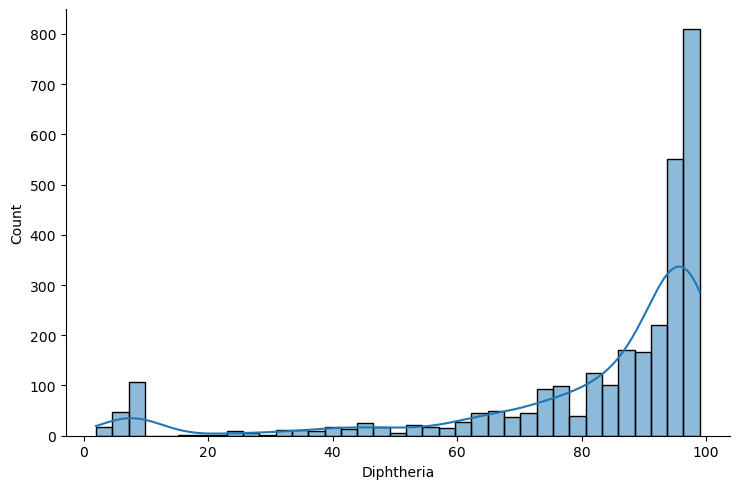

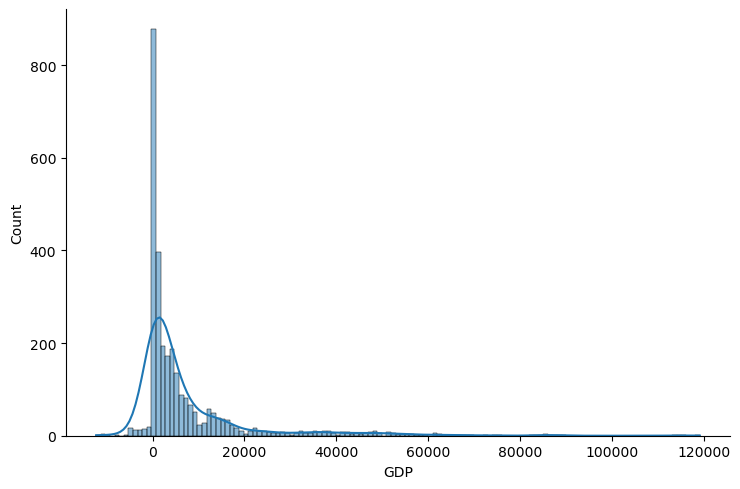

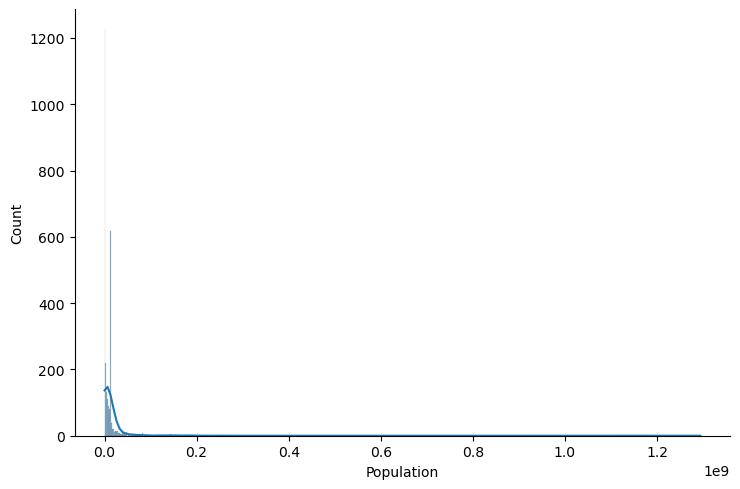

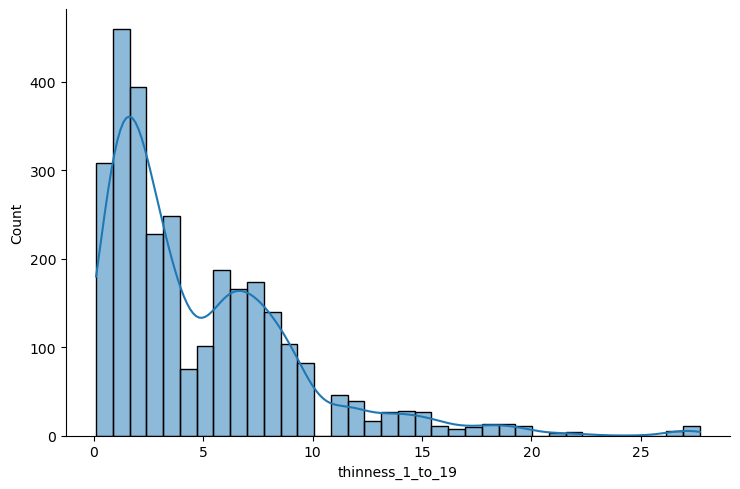

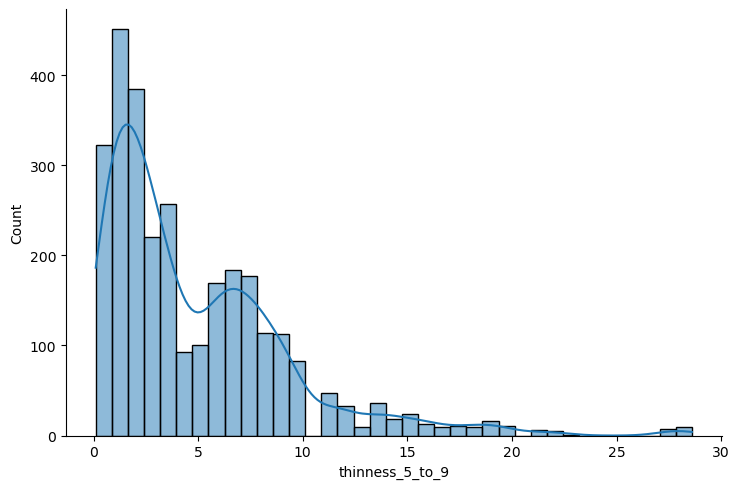

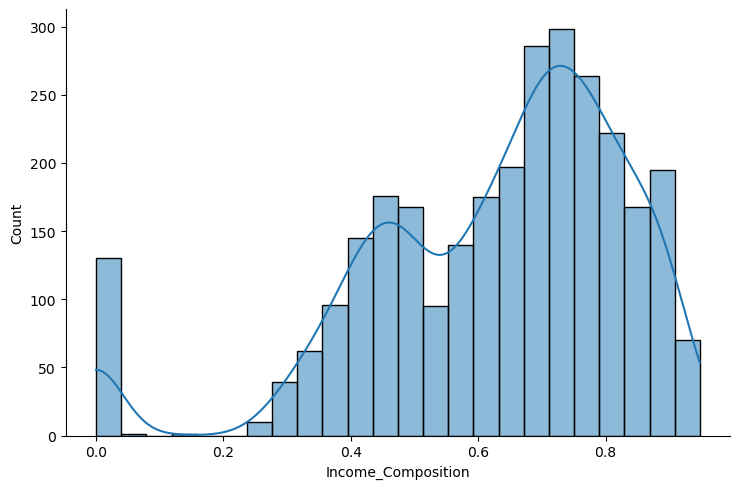

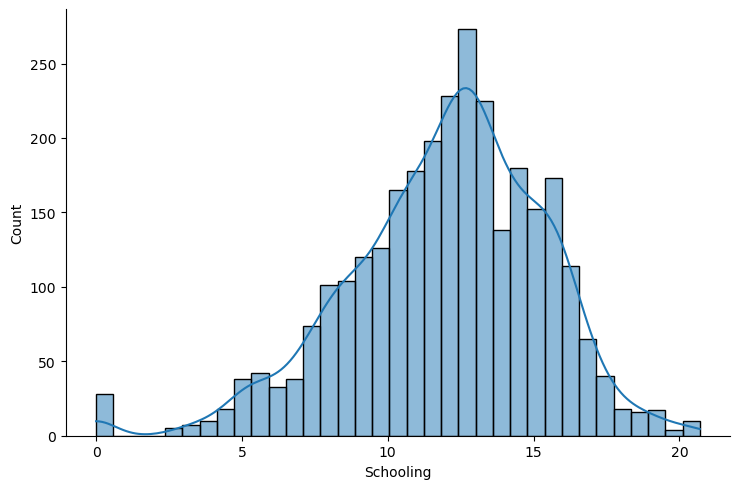

In [16]:
import seaborn as sns
import pandas as pd

def check_skewness(df):
    # Filter out non-numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Plot distributions for numeric columns
    for column in numeric_columns:
        sns.displot(x=column, data=df, kde=True, aspect=1.5)
        skewness = df[column].skew()
        if skewness > 0:
            skewness_desc = "right-skewed"
        elif skewness < 0:
            skewness_desc = "left-skewed"
        else:
            skewness_desc = "approximately symmetric"
        print(f"Skewness for column '{column}': {skewness} ({skewness_desc})")

# Check skewness for each numeric column
check_skewness(df)


Most of the columns exhibit significant skewness, with the majority being right-skewed.
Some columns have relatively low skewness values, indicating approximately symmetric distributions ('Year').
Several columns are highly skewed, particularly 'Population', with a skewness value of 18.04.

In [17]:
df.describe().iloc[:,1:9].T[['mean','50%']]


,mean,50%
Status,0.825732,1.000000
Infant_Deaths,30.303948,3.000000
Percentage_Exp,738.251295,64.912906
Measles,2419.592240,17.000000
under_five_deaths,42.035739,4.000000
HIV/AIDS,1.742103,0.100000
Life_Expectancy,69.225797,72.100000
Adult_Mortality,164.733468,144.000000


In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
corr = df.corr()
corr_values = corr['Life_Expectancy'].sort_values().round(3)
corr_values

Adult_Mortality      -0.697
HIV/AIDS             -0.556
Status               -0.481
thinness_1_to_19     -0.475
thinness_5_to_9      -0.470
under_five_deaths    -0.222
Infant_Deaths        -0.196
Measles              -0.157
Population           -0.021
Year                  0.170
Total_Exp             0.223
Hepatitis_B           0.373
Percentage_Exp        0.381
Alcohol               0.419
Polio                 0.469
Diphtheria            0.483
GDP                   0.488
BMI                   0.568
Income_Composition    0.739
Schooling             0.764
Life_Expectancy       1.000
Name: Life_Expectancy, dtype: float64

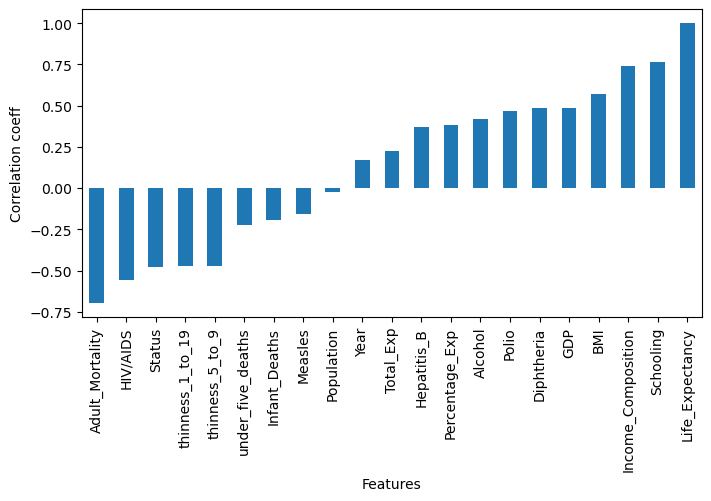

In [19]:
plt.figure(figsize=(8,4))
corr_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('Correlation coeff')
plt.show()

In [20]:
corr.round(2)

,Year,Status,Infant_Deaths,Percentage_Exp,Measles,under_five_deaths,HIV/AIDS,Life_Expectancy,Adult_Mortality,Alcohol,...,BMI,Polio,Total_Exp,Diphtheria,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
Year,1.00,0.00,-0.04,0.03,-0.08,-0.04,-0.14,0.17,-0.08,-0.04,...,0.11,0.10,0.09,0.14,0.10,0.01,-0.05,-0.05,0.23,0.20
Status,0.00,1.00,0.11,-0.45,0.08,0.12,0.15,-0.48,0.31,-0.59,...,-0.31,-0.22,-0.30,-0.22,-0.48,0.04,0.37,0.37,-0.49,-0.52
Infant_Deaths,-0.04,0.11,1.00,-0.09,0.50,1.00,0.03,-0.20,0.08,-0.12,...,-0.23,-0.17,-0.13,-0.17,-0.12,0.55,0.47,0.47,-0.16,-0.21
Percentage_Exp,0.03,-0.45,-0.09,1.00,-0.06,-0.09,-0.10,0.38,-0.24,0.34,...,0.23,0.15,0.17,0.14,0.87,-0.03,-0.25,-0.25,0.37,0.38
Measles,-0.08,0.08,0.50,-0.06,1.00,0.51,0.03,-0.16,0.03,-0.05,...,-0.17,-0.14,-0.11,-0.14,-0.08,0.24,0.22,0.22,-0.14,-0.15
under_five_deaths,-0.04,0.12,1.00,-0.09,0.51,1.00,0.04,-0.22,0.09,-0.12,...,-0.24,-0.19,-0.13,-0.20,-0.12,0.54,0.47,0.47,-0.18,-0.22
HIV/AIDS,-0.14,0.15,0.03,-0.10,0.03,0.04,1.00,-0.56,0.52,-0.05,...,-0.24,-0.16,-0.00,-0.17,-0.15,-0.03,0.20,0.21,-0.26,-0.23
Life_Expectancy,0.17,-0.48,-0.20,0.38,-0.16,-0.22,-0.56,1.00,-0.70,0.42,...,0.57,0.47,0.22,0.48,0.49,-0.02,-0.47,-0.47,0.74,0.76
Adult_Mortality,-0.08,0.31,0.08,-0.24,0.03,0.09,0.52,-0.70,1.00,-0.21,...,-0.39,-0.28,-0.12,-0.28,-0.32,-0.01,0.30,0.31,-0.48,-0.47
Alcohol,-0.04,-0.59,-0.12,0.34,-0.05,-0.12,-0.05,0.42,-0.21,1.00,...,0.34,0.23,0.31,0.23,0.39,-0.03,-0.44,-0.43,0.49,0.58


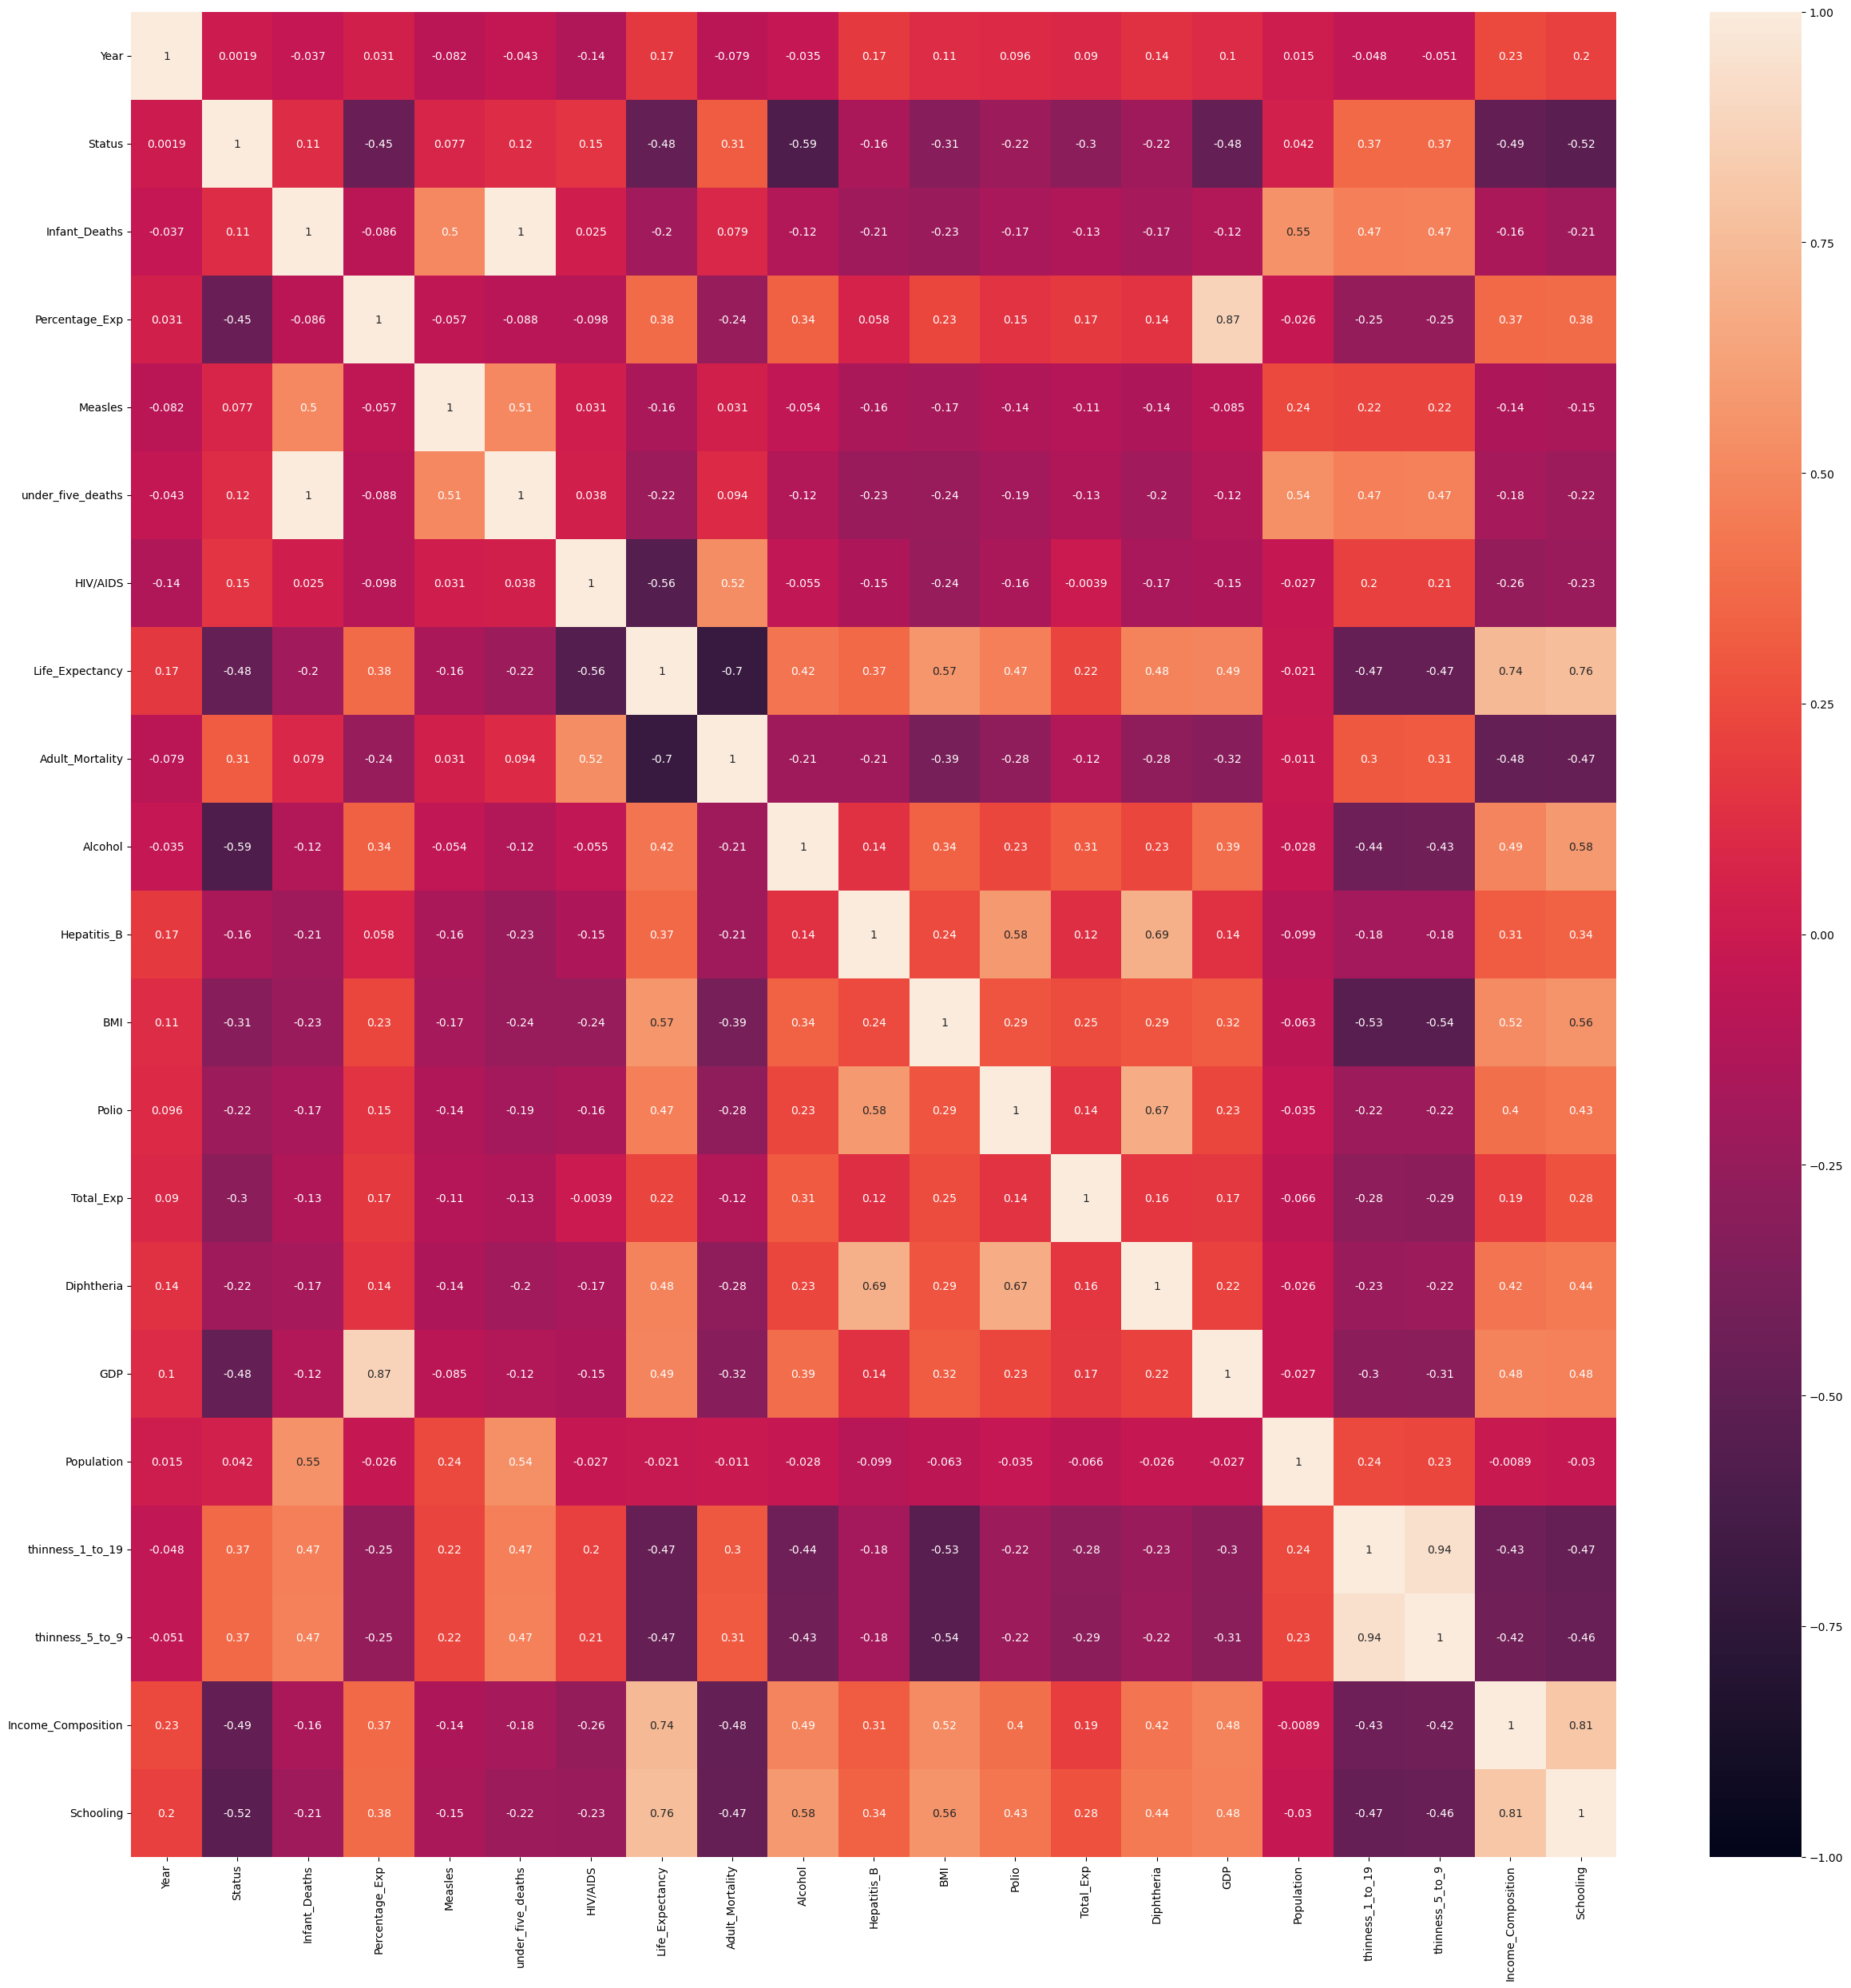

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
plt.figure(figsize =(30,30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

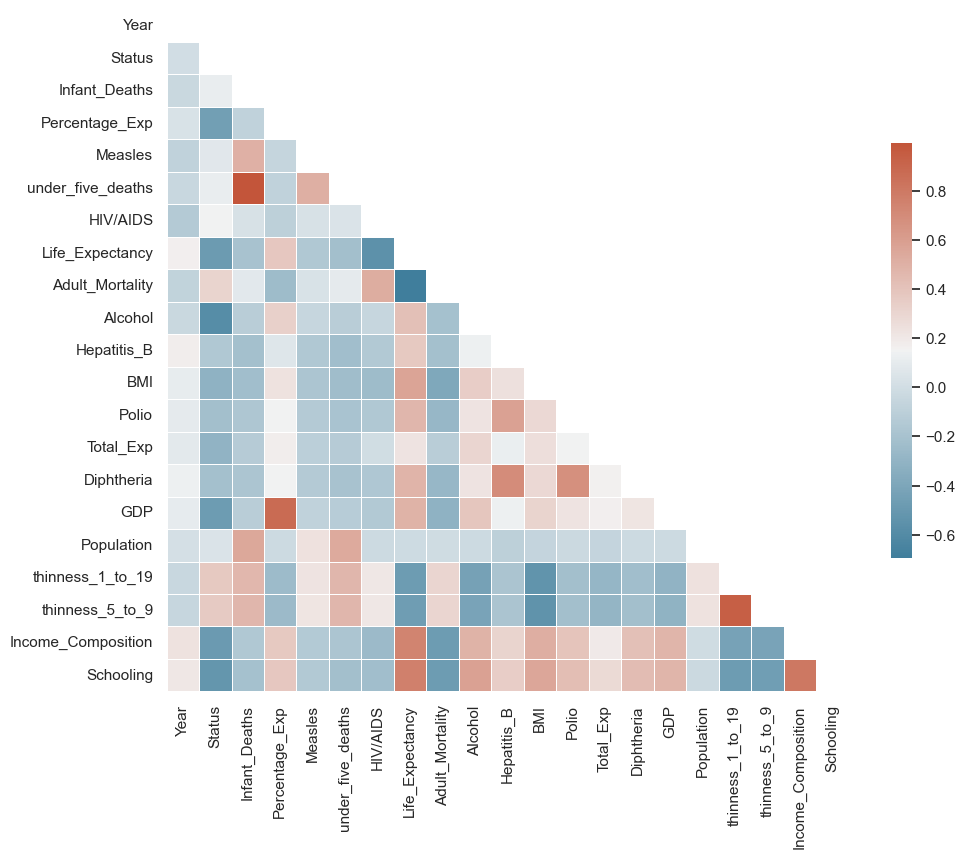

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.show()


The following features are highly correlated:
1. Under 5 deaths <---> Infant Deaths. 
2. Thinness 5-9   <---> Thinness 1-19. 

# Detecting outliers and anomalies

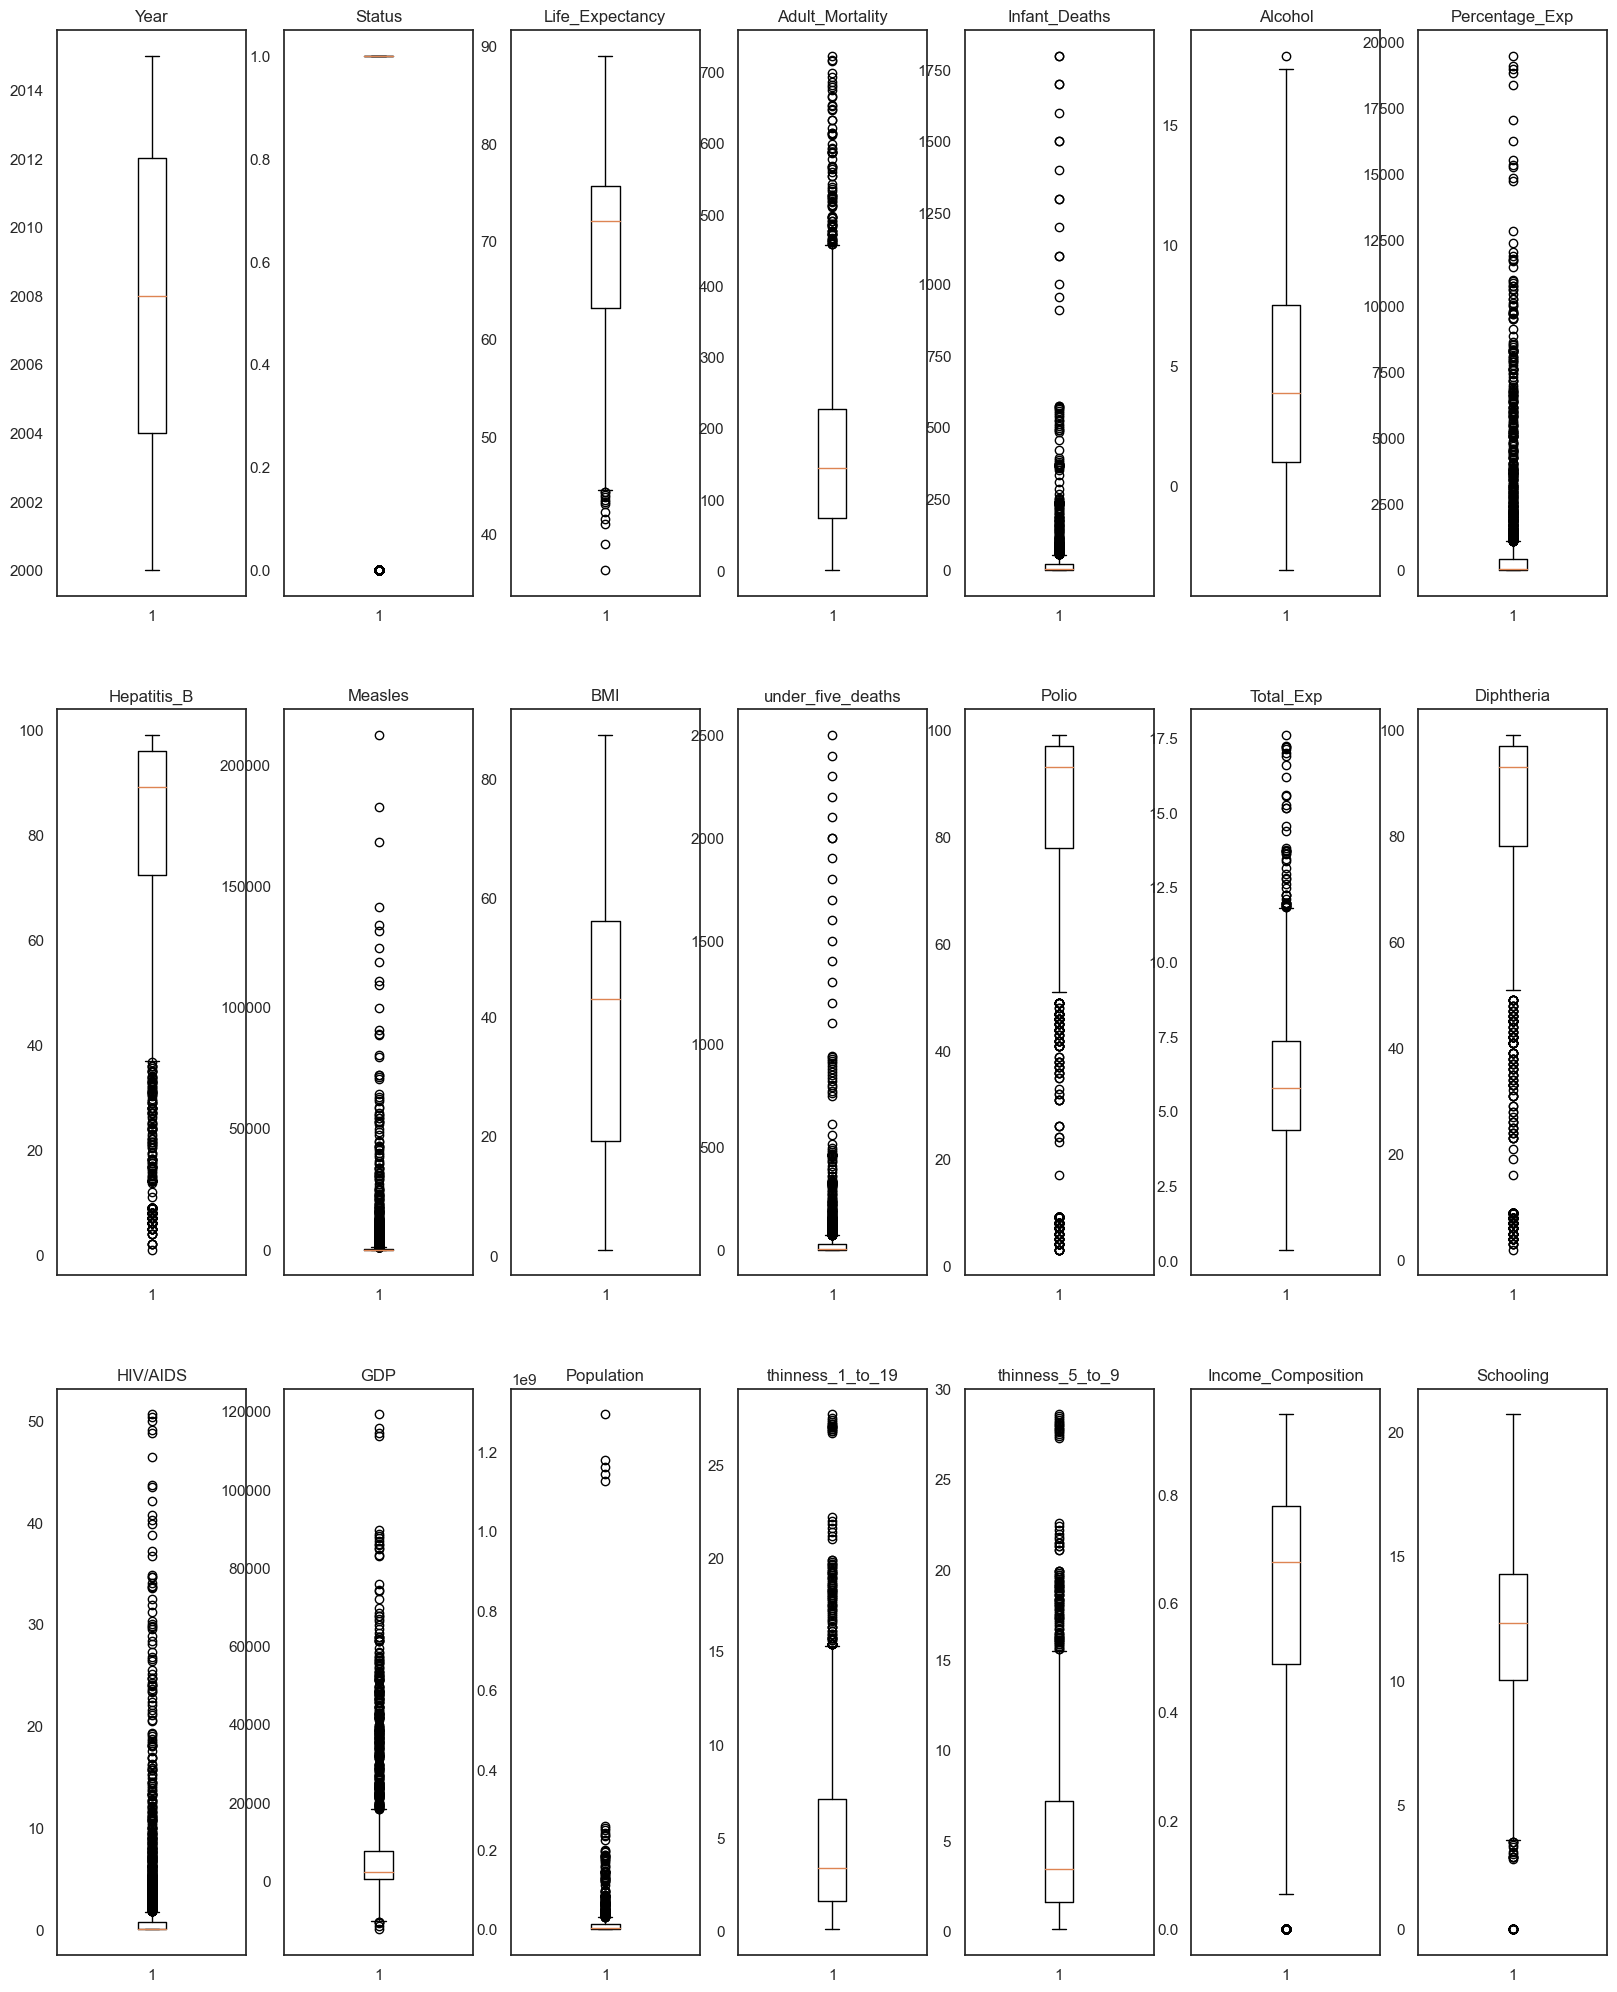

In [23]:
column_dict ={'Year':1, 'Status':2, 'Life_Expectancy':3, 'Adult_Mortality':4, 'Infant_Deaths':5,
       'Alcohol':6, 'Percentage_Exp':7, 'Hepatitis_B':8, 'Measles':9, 'BMI':10,
       'under_five_deaths':11, 'Polio':12, 'Total_Exp':13, 'Diphtheria':14, 'HIV/AIDS':15,
       'GDP':16, 'Population':17, 'thinness_1_to_19':18, 'thinness_5_to_9':19,
       'Income_Composition':20, 'Schooling':21}

plt.figure(figsize=(20,25))

for feature,i in column_dict.items():
                     plt.subplot(3,7,i)
                     plt.boxplot(df[feature])
                     plt.title(feature)

plt.show()

In [24]:
def identify_outliers(df):
    outliers_dict = {}
    for column_name in df.columns:
        q25, q75 = np.percentile(df[column_name], 25), np.percentile(df[column_name], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in df[column_name] if x < lower or x > upper]
        outliers_dict[column_name] = len(outliers)
    return outliers_dict

# Example usage:
# Assuming df is your DataFrame
outliers_info = identify_outliers(df)
print("Number of outliers in each column:")
print(outliers_info)


Number of outliers in each column:
{'Year': 0, 'Status': 512, 'Infant_Deaths': 315, 'Percentage_Exp': 389, 'Measles': 542, 'under_five_deaths': 394, 'HIV/AIDS': 542, 'Life_Expectancy': 12, 'Adult_Mortality': 85, 'Alcohol': 1, 'Hepatitis_B': 271, 'BMI': 0, 'Polio': 279, 'Total_Exp': 47, 'Diphtheria': 298, 'GDP': 309, 'Population': 195, 'thinness_1_to_19': 100, 'thinness_5_to_9': 99, 'Income_Composition': 130, 'Schooling': 40}


In [25]:
df.drop(columns=['under_five_deaths','thinness_5_to_9'],axis =1, inplace=True)

# KNN REGRESSION MODEL

In [26]:
X = df.drop(['Life_Expectancy'],axis =1)
y = df['Life_Expectancy']


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def knn_regression_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_scores = []
    test_scores = []
    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_scaled, y_train)
        train_scores.append(knn_reg.score(X_train_scaled, y_train))
        test_scores.append(knn_reg.score(X_test_scaled, y_test))

    best_k = 3
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)

    return knn_reg, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, train_scores, test_scores

def calculate_regression_metrics(y_true, y_pred, X_test, train_scores, test_scores):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    train_score_value = format(train_scores[0], ".4f")
    test_score_value = format(test_scores[0], ".4f")

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score_value,
        "Test Score": test_score_value
    }

    return evaluation_metrics
knn_model, X_train, X_test, y_train, y_test, y_pred, train_scores, test_scores = knn_regression_analysis(X, y)
metrics = calculate_regression_metrics(y_test, y_pred, X_test, train_scores, test_scores)
print(metrics)

{'RMSE': 3.151401510012964, 'RMSLE': 0.048043429061813095, 'MSE': 9.931331477311991, 'MAE': 2.1099591229620542, 'R-squared': 0.8887184567642934, 'Adjusted R-squared': 0.8863974048775695, 'Train Score': '0.9706', 'Test Score': '0.8911'}


The model performs exceptionally well on the training data, achieving a perfect score.

# AFTER CROSS VALIDATION

Train score: 0.9559
Test score: 0.8887

Cross-validated train scores: [0.90533648 0.90969571 0.89654923 0.89297911 0.88300174 0.88872157
 0.89674692]
Average cross-validated train score: 0.8961
Cross-validated test scores: [0.82179615 0.82704126 0.816476   0.84474592 0.84014086 0.85211127
 0.83891035]
Average cross-validated test score: 0.8345

Regression metrics after cross-validation on train set:
{'Root Mean Squared Error (RMSE)': 3.071110498467219, 'RMS Logarithmic Error (RMSLE)': 0.047415970775338864, 'Mean Squared Error (MSE)': 9.431719693795571, 'Mean Absolute Error (MAE)': 2.098866159536936, 'R-squared': 0.8964662793475223, 'Adjusted R-squared': 0.8955514011090615}

Regression metrics after cross-validation on test set:
{'Root Mean Squared Error (RMSE)': 3.8207087630850975, 'RMS Logarithmic Error (RMSLE)': 0.05860264438651014, 'Mean Squared Error (MSE)': 14.597815452315256, 'Mean Absolute Error (MAE)': 2.762371695983296, 'R-squared': 0.8364300461509353, 'Adjusted R-squared': 0.

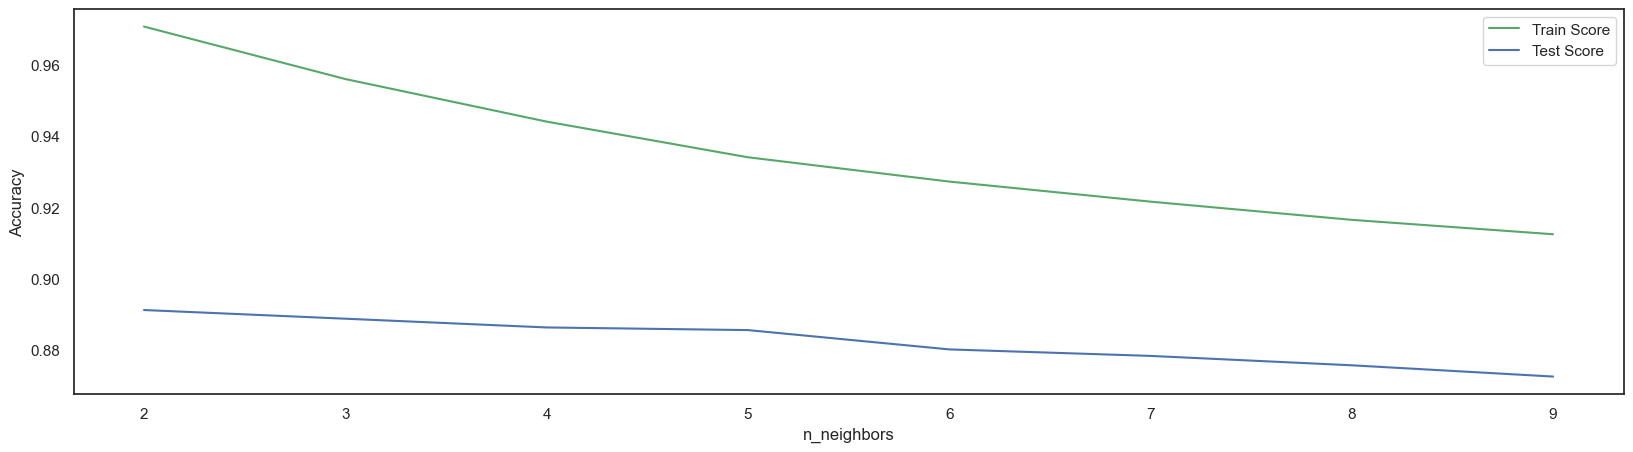

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

def calculate_regression_metrics(y_true, y_pred):
    # Calculate evaluation metrics
    mse = metrics.mean_squared_error(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    r_squared = metrics.r2_score(y_true, y_pred)
    n = len(y_true)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(metrics.mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    # Construct and return a dictionary of evaluation metrics
    evaluation_metrics = {
        "Root Mean Squared Error (RMSE)": rmse,
        "RMS Logarithmic Error (RMSLE)": rmsle,
        "Mean Squared Error (MSE)": mse,
        "Mean Absolute Error (MAE)": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared
    }

    return evaluation_metrics

def knn_regression_analysis(X, y):
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Scaling features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Visualization of the best value for k (n_neighbors)
    train_score_array = []
    test_score_array = []

    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_scaled, y_train)
        train_score_array.append(knn_reg.score(X_train_scaled, y_train))
        test_score_array.append(knn_reg.score(X_test_scaled, y_test))

    x_axis = range(2, 10)
    plt.subplots(figsize=(20, 5))
    plt.plot(x_axis, train_score_array, c='g', label='Train Score')
    plt.plot(x_axis, test_score_array, c='b', label='Test Score')
    plt.legend()
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')

    # Training and testing a KNeighborsRegressor with the chosen k value
    best_k = 3  # Choose the best k based on the visualization or any other criterion
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_scaled, y_train)
    train_score = knn_reg.score(X_train_scaled, y_train)
    test_score = knn_reg.score(X_test_scaled, y_test)

    print("Train score: {:.4f}".format(train_score))
    print("Test score: {:.4f}".format(test_score))

    # Apply cross-validation
    cv_train_scores = cross_val_score(knn_reg, X_train_scaled, y_train, cv=7)
    cv_test_scores = cross_val_score(knn_reg, X_test_scaled, y_test, cv=7)

    print("\nCross-validated train scores: {}".format(cv_train_scores))
    print("Average cross-validated train score: {:.4f}".format(cv_train_scores.mean()))
    print("Cross-validated test scores: {}".format(cv_test_scores))
    print("Average cross-validated test score: {:.4f}".format(cv_test_scores.mean()))

    # Predictions after cross-validation
    y_pred_cv_train = cross_val_predict(knn_reg, X_train_scaled, y_train, cv=7)
    y_pred_cv_test = cross_val_predict(knn_reg, X_test_scaled, y_test, cv=7)

    # Calculate regression metrics after cross-validation
    metrics_train = calculate_regression_metrics(y_train, y_pred_cv_train)
    metrics_test = calculate_regression_metrics(y_test, y_pred_cv_test)

    print("\nRegression metrics after cross-validation on train set:")
    print(metrics_train)
    print("\nRegression metrics after cross-validation on test set:")
    print(metrics_test)

    return knn_reg, X_train_scaled, X_test_scaled, y_train, y_test

# Define features and target variable
X = df.drop(['Life_Expectancy'], axis=1)
y = df['Life_Expectancy']

# Perform KNN regression analysis
knn_model, X_train_scaled, X_test_scaled, y_train, y_test = knn_regression_analysis(X, y)


The model performance is still quite good after cross-validation

# FEATURE SELECTION METHOD¶

# 1.FILTER METHOD:-

In [29]:
variances = df.var()
variances

Year                  2.128753e+01
Status                1.439478e-01
Infant_Deaths         1.390666e+04
Percentage_Exp        3.951805e+06
Measles               1.314983e+08
HIV/AIDS              2.578390e+01
Life_Expectancy       9.059715e+01
Adult_Mortality       1.540830e+04
Alcohol               1.583170e+01
Hepatitis_B           6.235534e+02
BMI                   4.008058e+02
Polio                 5.468031e+02
Total_Exp             5.815152e+00
Diphtheria            5.604919e+02
GDP                   1.798355e+08
Population            2.896208e+15
thinness_1_to_19      1.932454e+01
Income_Composition    4.425275e-02
Schooling             1.125023e+01
dtype: float64

In [30]:
#Setting Threshold Value  0.1
from sklearn.feature_selection import VarianceThreshold

def apply_variance_threshold(X_train, threshold=0.9):
    var_thres = VarianceThreshold(threshold=threshold)
    var_thres.fit(X_train)
    selected_features = X_train.columns[var_thres.get_support()]
    non_constant_features_count = sum(var_thres.get_support())
    constant_columns = [column for column in X_train.columns if column not in selected_features]
    print("Number of non-constant features:", non_constant_features_count)
    print("Constant columns removed:", constant_columns)
    print("Selected features:", selected_features)
    return X_train[selected_features]

In [31]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train_filtered = apply_variance_threshold(X_train, threshold=0.01)
X_train_filtered

Number of non-constant features: 15
Constant columns removed: ['Infant_Deaths', 'Measles', 'Population']
Selected features: Index(['Year', 'Status', 'Percentage_Exp', 'HIV/AIDS', 'Adult_Mortality',
       'Alcohol', 'Hepatitis_B', 'BMI', 'Polio', 'Total_Exp', 'Diphtheria',
       'GDP', 'thinness_1_to_19', 'Income_Composition', 'Schooling'],
      dtype='object')


,Year,Status,Percentage_Exp,HIV/AIDS,Adult_Mortality,Alcohol,Hepatitis_B,BMI,Polio,Total_Exp,Diphtheria,GDP,thinness_1_to_19,Income_Composition,Schooling
0,0.266667,1.0,0.000257,0.023762,0.308864,0.130470,0.312657,0.261877,0.677083,0.256669,0.051546,0.091105,0.032609,0.475738,0.323671
1,0.866667,1.0,0.010301,0.001980,0.264543,0.130470,0.979381,0.327926,0.979167,0.556609,0.979381,0.103336,0.202899,0.589662,0.531401
2,0.933333,1.0,0.022010,0.000000,0.009695,0.360911,0.989691,0.651217,0.989583,0.326615,0.989691,0.126559,0.039855,0.802743,0.685990
3,0.333333,1.0,0.005041,0.049505,0.527701,0.388052,0.397201,0.193511,0.375000,0.221103,0.371134,0.101957,0.032609,0.449367,0.328502
4,0.466667,1.0,0.016051,0.000000,0.131579,0.328649,0.927835,0.286211,0.947917,0.234143,0.938144,0.111787,0.166667,0.695148,0.550725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,0.333333,1.0,0.000652,0.075248,0.439058,0.192945,0.685210,0.025492,0.708333,0.405453,0.711340,0.091357,0.210145,0.417722,0.193237
2052,0.933333,1.0,0.000688,0.085149,0.042936,0.130470,0.000000,0.266512,0.218750,0.203320,0.000000,0.092126,0.304348,0.613924,0.444444
2053,0.866667,1.0,0.000456,0.019802,0.037396,0.130470,0.061856,0.329085,0.052083,0.193242,0.061856,0.091757,0.289855,0.528481,0.396135
2054,0.600000,1.0,0.001858,0.000000,0.227147,0.134567,0.721649,0.163384,0.781250,0.049200,0.721649,0.096562,0.416667,0.631857,0.584541


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def knn_regression_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_scores = []
    test_scores = []
    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_scaled, y_train)
        train_scores.append(knn_reg.score(X_train_scaled, y_train))
        test_scores.append(knn_reg.score(X_test_scaled, y_test))

    best_k = 3
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)

    return knn_reg, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, train_scores, test_scores

def calculate_regression_metrics(y_true, y_pred, X_test, train_scores, test_scores):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    train_score_value = format(train_scores[0], ".4f")
    test_score_value = format(test_scores[0], ".4f")

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score_value,
        "Test Score": test_score_value
    }

    return evaluation_metrics

# Example usage:
selected=['Year', 'Status', 'Percentage_Exp', 'HIV/AIDS', 'Adult_Mortality',
       'Alcohol', 'Hepatitis_B', 'BMI', 'Polio', 'Total_Exp', 'Diphtheria',
       'GDP', 'thinness_1_to_19', 'Income_Composition', 'Schooling']
X = df[selected]
y = df['Life_Expectancy']

knn_model, X_train, X_test, y_train, y_test, y_pred, train_scores, test_scores = knn_regression_analysis(X, y)
metrics = calculate_regression_metrics(y_test, y_pred, X_test, train_scores, test_scores)
print(metrics)


{'RMSE': 3.20823434420236, 'RMSLE': 0.04898022210513595, 'MSE': 10.292767607319547, 'MAE': 2.1264368251540415, 'R-squared': 0.8846685294790883, 'Adjusted R-squared': 0.8826708712137145, 'Train Score': '0.9702', 'Test Score': '0.8879'}


Before using the variance threshold filter, the model was really good at fitting the training data perfectly, but it wasn't as good at handling new data. After applying the filter, the model's performance stayed strong. It still fit the training data well and did a good job with new data too. So, even though there was a small change in how well it fit the training data, its ability to predict new data stayed about the same.

# CORRELATION

In [33]:
def apply_pearson_correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    selected_features = [col for col in dataset.columns if col not in col_corr]
    return col_corr, selected_features

In [34]:
import pandas as pd

# Convert your NumPy array to a Pandas DataFrame
X_train_df = pd.DataFrame(X_train)

# Now apply the Pearson correlation function
correlated_features, selected_features = apply_pearson_correlation(X_train_df, 0.5)

# Print the results
print("Number of correlated features:", len(correlated_features))
print("Number of selected features:", len(selected_features))
print("Correlated features:", correlated_features)
print("Selected features:", selected_features)


Number of correlated features: 8
Number of selected features: 7
Correlated features: {4, 5, 8, 10, 11, 12, 13, 14}
Selected features: [0, 1, 2, 3, 6, 7, 9]


In [35]:
print(df.columns)

Index(['Year', 'Status', 'Infant_Deaths', 'Percentage_Exp', 'Measles',
       'HIV/AIDS', 'Life_Expectancy', 'Adult_Mortality', 'Alcohol',
       'Hepatitis_B', 'BMI', 'Polio', 'Total_Exp', 'Diphtheria', 'GDP',
       'Population', 'thinness_1_to_19', 'Income_Composition', 'Schooling'],
      dtype='object')


In [36]:
selected = ["Year", "Status", "Infant_Deaths", "Percentage_Exp", "Adult_Mortality", "Hepatitis_B"]
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def knn_regression_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_scores = []
    test_scores = []
    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_scaled, y_train)
        train_scores.append(knn_reg.score(X_train_scaled, y_train))
        test_scores.append(knn_reg.score(X_test_scaled, y_test))

    best_k = 3
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)

    return knn_reg, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, train_scores, test_scores

def calculate_regression_metrics(y_true, y_pred, X_test, train_scores, test_scores):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    train_score_value = format(train_scores[0], ".4f")
    test_score_value = format(test_scores[0], ".4f")

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score_value,
        "Test Score": test_score_value
    }

    return evaluation_metrics

# Define your DataFrame df

selected = ["Year", "Status", "Infant_Deaths", "Percentage_Exp", "Adult_Mortality", "Hepatitis_B"]
X = df[selected]
y = df['Life_Expectancy']

knn_model, X_train, X_test, y_train, y_test, y_pred, train_scores, test_scores = knn_regression_analysis(X, y)
metrics = calculate_regression_metrics(y_test, y_pred, X_test, train_scores, test_scores)
print(metrics)


{'RMSE': 4.348943736249266, 'RMSLE': 0.06554827242993048, 'MSE': 18.91331162106173, 'MAE': 2.8471637120225415, 'R-squared': 0.7880744883304176, 'Adjusted R-squared': 0.7866212848218261, 'Train Score': '0.9370', 'Test Score': '0.7619'}


Before considering correlation, the model performed well, with a training score of 0.9370 and a test score of 0.7619. The model had an RMSE of 4.3489, indicating the typical magnitude of prediction errors, and explained about 78.81% of the variability in the data.

After considering correlation, the models performance metrics saw slight changes. The training score remained relatively high at 0.9370, indicating a good fit with the training data. However, the test score decreased slightly to 0.7619, suggesting a slight decrease in accuracy when predicting new data. The RMSE increased to 4.3489, indicating larger prediction errors, and the model explained about 78.81% of the variability in the data.

# Information Gain

In [48]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
import pandas as pd

def apply_mutual_information_regression(X_train, y_train, percentile=50):
    # Determine the mutual information
    mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
    mutual_info_series = pd.Series(mutual_info, index=X_train.columns)
    mutual_info_sorted = mutual_info_series.sort_values(ascending=False)
    mutual_info_sorted.plot.bar(figsize=(15,5))
    
    # Select the top percentile features
    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=percentile)
    selected_top_columns.fit(X_train.fillna(0), y_train)
    
    # Get the names of selected features
    selected_features = X_train.columns[selected_top_columns.get_support()]
    
    return mutual_info_sorted, selected_features

Mutual Information sorted: Adult_Mortality    1.270940
Infant_Deaths      0.390142
Percentage_Exp     0.293003
Hepatitis_B        0.252208
Status             0.207656
Year               0.083929
dtype: float64
Selected features: Index(['Infant_Deaths', 'Percentage_Exp', 'Adult_Mortality', 'Hepatitis_B'], dtype='object')


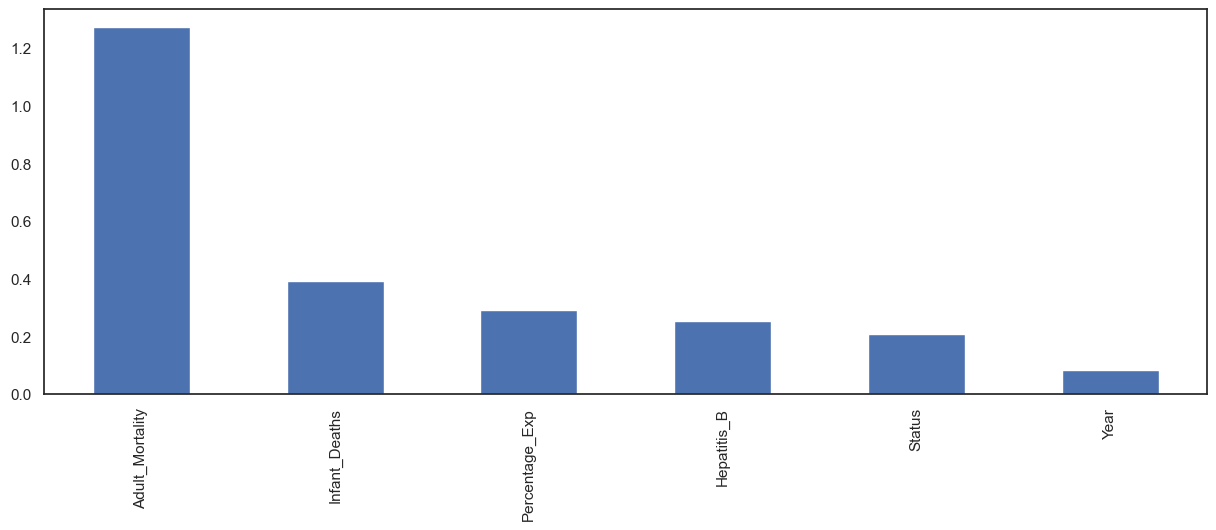

In [50]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
mutual_info_sorted, selected_features = apply_mutual_information_regression(X_train, y_train, percentile=70)
print("Mutual Information sorted:", mutual_info_sorted)
print("Selected features:", selected_features)

In [51]:
selected = ['Infant_Deaths', 'Percentage_Exp', 'Adult_Mortality', 'Hepatitis_B']
X = df[selected]
y = df['Life_Expectancy']
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def knn_regression_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_scores = []
    test_scores = []
    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_scaled, y_train)
        train_scores.append(knn_reg.score(X_train_scaled, y_train))
        test_scores.append(knn_reg.score(X_test_scaled, y_test))

    best_k = 3
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)

    return knn_reg, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, train_scores, test_scores

def calculate_regression_metrics(y_true, y_pred, X_test, train_scores, test_scores):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    train_score_value = format(train_scores[0], ".4f")
    test_score_value = format(test_scores[0], ".4f")

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score_value,
        "Test Score": test_score_value
    }

    return evaluation_metrics



knn_model, X_train, X_test, y_train, y_test, y_pred, train_scores, test_scores = knn_regression_analysis(X, y)
metrics = calculate_regression_metrics(y_test, y_pred, X_test, train_scores, test_scores)
print(metrics)

{'RMSE': 4.16276083292738, 'RMSLE': 0.06157599833810943, 'MSE': 17.328577752154256, 'MAE': 2.5205631615039814, 'R-squared': 0.8058315867570273, 'Adjusted R-squared': 0.8049459839600239, 'Train Score': '0.9406', 'Test Score': '0.8046'}


Before feature selection information gain the model performed better in terms of accuracy and fit, with lower error metrics and higher R-squared values.
After feature selection, the model performance slightly deteriorated, with higher error metrics and lower R-squared values.
Despite the decrease in performance, the model still demonstrates reasonable predictive ability, suggesting that feature selection may have simplified the model without significantly compromising its overall accuracy

# chi-square test

The Chi-square test is suitable only for categorical attributes. Since our data comprises numerical variables, using the Chi-square test may yield inaccurate results. Therefore, it would be prudent to opt for the ANOVA test, which is better suited for numerical data analysis and is expected to provide more accurate and reliable results.

# ANOVA TEST

In [56]:
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import pandas as pd

def apply_anova_feature_selection(X, y, k=5):
    fs = SelectKBest(score_func=f_classif, k=k)
    fs.fit(X, y)
    support = fs.get_support()
    num_selected_features = support.sum()
    feature_score = pd.DataFrame({
        "Input_Features": X.columns,
        "Score": fs.scores_,
        "P_Value": np.round(fs.pvalues_, 4)
    })
    top_features = feature_score.nlargest(k, columns="Score")
    selected_features = top_features["Input_Features"].tolist()  # Extract selected feature names
    return support, num_selected_features, selected_features

# Example usage:
support, num_selected_features, selected_features = apply_anova_feature_selection(X, y, k=4)
print("Support:", support)
print("Number of selected features:", num_selected_features)
print("Selected features:", selected_features)

Support: [ True  True  True  True]
Number of selected features: 4
Selected features: ['Adult_Mortality', 'Percentage_Exp', 'Hepatitis_B', 'Infant_Deaths']


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def knn_regression_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_scores = []
    test_scores = []
    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_scaled, y_train)
        train_scores.append(knn_reg.score(X_train_scaled, y_train))
        test_scores.append(knn_reg.score(X_test_scaled, y_test))

    best_k = 3
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)

    return knn_reg, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, train_scores, test_scores

def calculate_regression_metrics(y_true, y_pred, X_test, train_scores, test_scores):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    train_score_value = format(train_scores[0], ".4f")
    test_score_value = format(test_scores[0], ".4f")

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score_value,
        "Test Score": test_score_value
    }

    return evaluation_metrics

# Define your DataFrame df
# Assuming you have already defined your DataFrame df

selected = ['Adult_Mortality', 'Percentage_Exp', 'Hepatitis_B', 'Infant_Deaths']
X = df[selected]
y = df['Life_Expectancy']

knn_model, X_train, X_test, y_train, y_test, y_pred, train_scores, test_scores = knn_regression_analysis(X, y)
metrics = calculate_regression_metrics(y_test, y_pred, X_test, train_scores, test_scores)
print(metrics)


{'RMSE': 4.16276083292738, 'RMSLE': 0.06157599833810943, 'MSE': 17.328577752154256, 'MAE': 2.5205631615039814, 'R-squared': 0.8058315867570273, 'Adjusted R-squared': 0.8049459839600239, 'Train Score': '0.9405', 'Test Score': '0.8046'}


RMSE, RMSLE, MSE, MAE: These error metrics increased after the ANOVA test, indicating that the models predictions are less accurate compared to before.
R-squared, Adjusted R-squared: These values decreased after the ANOVA test, suggesting that the proportion of variance explained by the model decreased slightly.
Train Score, Test Score: Both the training and test scores decreased after the ANOVA test, indicating a decrease in the models performance on unseen data.

# 2.WRAPPER METHOD

# FORWARD BASED FEATURE SELECTION

In [77]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

def forward_feature_selection(X_train, y_train, n_features_to_select=3, n_estimators=100, random_state=0):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    selected_features = []
    for i in range(n_features_to_select):
        remaining_features = list(set(X_train.columns) - set(selected_features))
        best_score = -np.inf
        best_feature = None
        for feature in remaining_features:
            current_features = selected_features + [feature]
            cv_score = np.mean(cross_val_score(rf, X_train[current_features], y_train, cv=4, scoring='neg_mean_squared_error'))
            if cv_score > best_score:
                best_score = cv_score
                best_feature = feature
        selected_features.append(best_feature)

    return selected_features

# Example usage:
# selected_features = forward_feature_selection(X_train, y_train, n_features_to_select=3)
# print("Selected features:", selected_features)


In [78]:
selected_features = forward_feature_selection(X_train, y_train, n_features_to_select=3)
print("Selected features:", selected_features)

Selected features: ['Adult_Mortality', 'Infant_Deaths', 'Hepatitis_B']


In [79]:
selected_features = forward_feature_selection(X_train, y_train, n_features_to_select=4)
print("Selected features:", selected_features)

Selected features: ['Adult_Mortality', 'Infant_Deaths', 'Hepatitis_B', 'Percentage_Exp']


In [80]:
selected_features = forward_feature_selection(X_train, y_train, n_features_to_select=5)
print("Selected features:", selected_features)

Selected features: ['Adult_Mortality', 'Infant_Deaths', 'Hepatitis_B', 'Percentage_Exp', None]


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def knn_regression_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_scores = []
    test_scores = []
    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_scaled, y_train)
        train_scores.append(knn_reg.score(X_train_scaled, y_train))
        test_scores.append(knn_reg.score(X_test_scaled, y_test))

    best_k = 3
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)

    return knn_reg, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, train_scores, test_scores

def calculate_regression_metrics(y_true, y_pred, X_test, train_scores, test_scores):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    train_score_value = format(train_scores[0], ".4f")
    test_score_value = format(test_scores[0], ".4f")

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score_value,
        "Test Score": test_score_value
    }

    return evaluation_metrics

# Define your DataFrame df
# Assuming you have already defined your DataFrame df

selected = ['Adult_Mortality', 'Infant_Deaths', 'Hepatitis_B', 'Percentage_Exp']
X = df[selected]
y = df['Life_Expectancy']

knn_model, X_train, X_test, y_train, y_test, y_pred, train_scores, test_scores = knn_regression_analysis(X, y)
metrics = calculate_regression_metrics(y_test, y_pred, X_test, train_scores, test_scores)
print(metrics)


{'RMSE': 4.16276083292738, 'RMSLE': 0.06157599833810943, 'MSE': 17.328577752154256, 'MAE': 2.5205631615039814, 'R-squared': 0.8058315867570273, 'Adjusted R-squared': 0.8049459839600239, 'Train Score': '0.9405', 'Test Score': '0.8046'}


The lower R-squared and higher error metrics compared to the previous model evaluation indicate potential changes in the models performance due to feature selection due to forward based feature selection .It suggests that the subset of features selected through forward feature selection might not be as effective as the previous set of features in explaining the variance in the target variable and making accurate predictions.


# BACKWARD FEATURE SELECTION

In [94]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

def backward_feature_selection(X_train, y_train, n_features_to_select=8, n_estimators=100, random_state=0):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    selected_features = list(X_train.columns)
    for i in range(len(X_train.columns) - n_features_to_select):
        best_score = -np.inf
        worst_feature = None
        for feature in selected_features:
            current_features = selected_features.copy()
            current_features.remove(feature)
            cv_score = np.mean(cross_val_score(rf, X_train[current_features], y_train, cv=4, scoring='neg_mean_squared_error'))
            if cv_score > best_score:
                best_score = cv_score
                worst_feature = feature
        selected_features.remove(worst_feature)

    return selected_features

# Example usage:
# selected_features = backward_feature_selection(X_train, y_train, n_features_to_select=3)
# print("Selected features:", selected_features)


In [95]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
selected_features = backward_feature_selection(X_train, y_train, n_features_to_select=8)
print("Selected features:", selected_features)


Selected features: ['Adult_Mortality', 'Infant_Deaths', 'Hepatitis_B', 'Percentage_Exp']


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def knn_regression_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_scores = []
    test_scores = []
    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_scaled, y_train)
        train_scores.append(knn_reg.score(X_train_scaled, y_train))
        test_scores.append(knn_reg.score(X_test_scaled, y_test))

    best_k = 3
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)

    return knn_reg, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, train_scores, test_scores

def calculate_regression_metrics(y_true, y_pred, X_test, train_scores, test_scores):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    train_score_value = format(train_scores[0], ".4f")
    test_score_value = format(test_scores[0], ".4f")

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score_value,
        "Test Score": test_score_value
    }

    return evaluation_metrics

# Define your DataFrame df
# Assuming you have already defined your DataFrame df

selected = ['Adult_Mortality', 'Infant_Deaths', 'Hepatitis_B', 'Percentage_Exp']
X = df[selected]
y = df['Life_Expectancy']

knn_model, X_train, X_test, y_train, y_test, y_pred, train_scores, test_scores = knn_regression_analysis(X, y)
metrics = calculate_regression_metrics(y_test, y_pred, X_test, train_scores, test_scores)
print(metrics)


{'RMSE': 4.16276083292738, 'RMSLE': 0.06157599833810943, 'MSE': 17.328577752154256, 'MAE': 2.5205631615039814, 'R-squared': 0.8058315867570273, 'Adjusted R-squared': 0.8049459839600239, 'Train Score': '0.9405', 'Test Score': '0.8046'}


these metrics indicate that the model's performance after backward feature selection is similar to the performance before feature selection, with consistent R-squared values and error metrics. This suggests that the selected features through backward feature selection adequately capture the underlying patterns in the data, maintaining the model's predictive ability.

# RECURSIVE FEATURE ELIMINATION

In [102]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

def recursive_feature_elimination(X, y, estimator, n_features_to_select):
    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    selected_features = [col for i, col in zip(range(X.shape[1]), X.columns) if rfe.support_[i]]
    feature_rankings = {col: rank for col, rank in zip(X.columns, rfe.ranking_)}
    return selected_features, feature_rankings

# Example usage:
# Assuming X and y are your feature matrix and target vector respectively
estimator = DecisionTreeRegressor()  # Instantiate DecisionTreeRegressor
selected_features, feature_rankings = recursive_feature_elimination(X, y, estimator, n_features_to_select)
print("Selected Features:", selected_features)
print("Feature Rankings:", feature_rankings)


Selected Features: ['Adult_Mortality', 'Infant_Deaths', 'Hepatitis_B']
Feature Rankings: {'Adult_Mortality': 1, 'Infant_Deaths': 1, 'Hepatitis_B': 1, 'Percentage_Exp': 2}


In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def knn_regression_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_scores = []
    test_scores = []
    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_scaled, y_train)
        train_scores.append(knn_reg.score(X_train_scaled, y_train))
        test_scores.append(knn_reg.score(X_test_scaled, y_test))

    best_k = 3
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)

    return knn_reg, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, train_scores, test_scores

def calculate_regression_metrics(y_true, y_pred, X_test, train_scores, test_scores):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    train_score_value = format(train_scores[0], ".4f")
    test_score_value = format(test_scores[0], ".4f")

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score_value,
        "Test Score": test_score_value
    }

    return evaluation_metrics

# Define your DataFrame df
# Assuming you have already defined your DataFrame df

selected = ['Adult_Mortality', 'Infant_Deaths', 'Hepatitis_B', 'Percentage_Exp']
X = df[selected]
y = df['Life_Expectancy']

knn_model, X_train, X_test, y_train, y_test, y_pred, train_scores, test_scores = knn_regression_analysis(X, y)
metrics = calculate_regression_metrics(y_test, y_pred, X_test, train_scores, test_scores)
print(metrics)


{'RMSE': 4.16276083292738, 'RMSLE': 0.06157599833810943, 'MSE': 17.328577752154256, 'MAE': 2.5205631615039814, 'R-squared': 0.8058315867570273, 'Adjusted R-squared': 0.8049459839600239, 'Train Score': '0.9405', 'Test Score': '0.8046'}


 these metrics indicate how well the model performs after recursive feature elimination. The RFE process aims to select the most relevant features while discarding less useful ones. In this case, the models performance metrics seem consistent with the performance before feature elimination, suggesting that the selected features are sufficient to capture the underlying patterns in the data.

# PCA ( Dimensionality Reduction)¶

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98, random_state= 0) #To explain 98% variance

#Transforming the train and test set
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [109]:
pca.n_components_

4

In [110]:
pca.explained_variance_ratio_.sum()

1.0

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

def apply_pca(X_train, X_test, n_components):
    pca = PCA(n_components=n_components, random_state=0)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

def knn_regression_analysis_with_pca(X, y, n_components):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    X_train_pca, X_test_pca = apply_pca(X_train_scaled, X_test_scaled, n_components)

    train_scores = []
    test_scores = []
    for k in range(2, 10):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(X_train_pca, y_train)
        train_scores.append(knn_reg.score(X_train_pca, y_train))
        test_scores.append(knn_reg.score(X_test_pca, y_test))

    best_k = 3
    knn_reg = KNeighborsRegressor(n_neighbors=best_k)
    knn_reg.fit(X_train_pca, y_train)
    y_pred = knn_reg.predict(X_test_pca)

    return knn_reg, X_train_pca, X_test_pca, y_train, y_test, y_pred, train_scores, test_scores

def calculate_regression_metrics(y_true, y_pred, X_test, train_scores, test_scores):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    train_score_value = format(train_scores[0], ".4f")
    test_score_value = format(test_scores[0], ".4f")

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score_value,
        "Test Score": test_score_value
    }

    return evaluation_metrics

# Example usage
X = df.drop(['Life_Expectancy'], axis=1)
y = df['Life_Expectancy']

knn_model, X_train_pca, X_test_pca, y_train, y_test, y_pred, train_scores, test_scores = knn_regression_analysis_with_pca(X, y, n_components)
metrics = calculate_regression_metrics(y_test, y_pred, X_test_pca, train_scores, test_scores)
print(metrics)


{'RMSE': 3.260868627433644, 'RMSLE': 0.049714966176947886, 'MSE': 10.633264205380977, 'MAE': 2.2090996866278596, 'R-squared': 0.8808532317030201, 'Adjusted R-squared': 0.8790687754958073, 'Train Score': '0.9662', 'Test Score': '0.8781'}


The model's accuracy slightly decreased, as indicated by higher RMSE, RMSLE, MSE, and MAE.
The model explained slightly less variance in the target variable, with a decrease in R-squared and adjusted R-squared.
Both training and test scores slightly dropped, suggesting a small reduction in overall performance.
Despite these reductions, PCA may still offer benefits such as computational efficiency and addressing multicollinearity.

# OLS REGRESSION MODEL

In [113]:
import pandas as pd
import statsmodels.api as sm

X = df.drop(['Life_Expectancy'], axis=1)
y = df['Life_Expectancy']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     793.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:40:20   Log-Likelihood:                -8182.5
No. Observations:                2938   AIC:                         1.640e+04
Df Residuals:                    2919   BIC:                         1.652e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                157.8726     33

based on the provided output, the regression model seems to perform relatively well in explaining life expectancy, with a high R-squared value, a significant F-statistic

# CONCLUSION

1.Initially, the model excelled in fitting training data but struggled with new data. However, applying a variance threshold filter improved its performance without compromising training data fit. Despite slight changes in performance metrics after considering correlation, the model maintained a relatively high training score. Before feature selection, it showed superior performance with lower errors and higher R-squared values, which slightly declined post-selection but retained reasonable predictive ability.
2.The ANOVA test highlighted increased errors, suggesting reduced accuracy. Forward feature selection hinted at less effective feature subsets, while backward selection maintained performance consistency. Recursive feature elimination (RFE) and Principal Component Analysis (PCA) maintained stable performance, with PCA offering computational efficiency and addressing multicollinearity. Overall, the regression model effectively explained life expectancy, evident through its high R-squared value and significant F-statistic.